# --------------------------- Importing Libraries ---------------------------

In [4]:
# --------------------------- Importing Libraries ---------------------------
print("--------------------------- Importing Libraries ---------------------------")
from ray.air import session
from torch.utils.data import Dataset, DataLoader, Subset
from scipy.io import savemat
from torch.utils.data import DataLoader
from utils import *
# from utils.utils import MyDataset, corr2, count_parameters
from prettytable import PrettyTable
import sys
import torch
import torch.nn as nn
import torchvision.transforms as transforms

--------------------------- Importing Libraries ---------------------------


# --------------------------- CNN Architecture ---------------------------

In [5]:
# --------------------------- CNN Architecture ---------------------------
print("--------------------------- Setting CNN Architecture ---------------------------")
#Creating a CNN class
class ConvNeuralNet(nn.Module):

        # Determine what layers and their order in CNN object
        def __init__(self, num_classes):

                super(ConvNeuralNet, self).__init__()

                self.conv_layer1 = nn.Conv2d(in_channels=2, out_channels=64, kernel_size=5, padding="same")
                self.conv_layer2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=5, padding="same")
                self.conv_layer3 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=5, padding="same")
                self.conv_layer4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=5, padding="same")
                self.conv_layer5 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=5, padding="same")
                self.conv_layer6 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=5, padding="same")
                self.conv_layer7 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=5, padding="same")
                self.conv_layer8 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=5, padding="same")
                self.conv_layer9 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=5, padding="same")
                self.conv_layer10 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=5, padding="same")
                self.conv_layer11 = nn.Conv2d(in_channels=64, out_channels=3, kernel_size=5, padding="same")
                self.relu1 = nn.ReLU()

        def forward(self, x):

                out = self.conv_layer1(x) # Layer1 (Input Layer)
                out = self.relu1(out)

                ## Hidden Layers
                out = self.conv_layer2(out) #Layer2
                out = self.relu1(out)

                out = self.conv_layer3(out) #Layer3
                out = self.relu1(out)

                out = self.conv_layer4(out) #Layer4
                out = self.relu1(out)

                out = self.conv_layer5(out) #Layer5
                out = self.relu1(out)

                out = self.conv_layer6(out) #Layer6
                out = self.relu1(out)

                out = self.conv_layer7(out) #Layer7
                out = self.relu1(out)

                out = self.conv_layer8(out) #Layer8
                out = self.relu1(out)

                out = self.conv_layer9(out) #Layer9
                out = self.relu1(out)

                out = self.conv_layer10(out) #Layer10
                out = self.relu1(out)

                out = self.conv_layer11(out) #Layer11 (Output Layer)
                return out

--------------------------- Setting CNN Architecture ---------------------------


# --------------------------- Setting up Hyper-Parmeters for CNN ---------------------------

In [6]:
# --------------------------- Setting up Hyper-Parmeters for CNN ---------------------------
print("--------------------------- Setting up Hyper-Parmeters for CNN ---------------------------")
#Define relevant parameters for Training
config_default = {
          "device": torch.device('cuda' if torch.cuda.is_available() else 'cpu'), 
          "batch_size_train": 16, 
          "learning_rate": 5e-5,
          "num_classes": 1,
          "num_epochs": 10,
          "p_data":2000, # Number of data to be trained 
         }
config = config_default

--------------------------- Setting up Hyper-Parmeters for CNN ---------------------------


# --------------------------- Initialization ---------------------------

In [7]:
# --------------------------- Initialization ---------------------------
print("--------------------------- Training Initialization ---------------------------")

# 0. Model Initialization
model = ConvNeuralNet(config["num_classes"]).to(config["device"])

print('**** Number of Trainable Parameters in BNN ****')
count_parameters(model)

# 0.1. Set loss funtion with criterion
criterion = nn.MSELoss()

# 0.2 Set the optimizer (Adam)
optimizer = torch.optim.Adam(model.parameters(), lr= config['learning_rate'], betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad = True)

--------------------------- Training Initialization ---------------------------
**** Number of Trainable Parameters in BNN ****
+---------------------+------------+
|       Modules       | Parameters |
+---------------------+------------+
|  conv_layer1.weight |    3200    |
|   conv_layer1.bias  |     64     |
|  conv_layer2.weight |   102400   |
|   conv_layer2.bias  |     64     |
|  conv_layer3.weight |   102400   |
|   conv_layer3.bias  |     64     |
|  conv_layer4.weight |   102400   |
|   conv_layer4.bias  |     64     |
|  conv_layer5.weight |   102400   |
|   conv_layer5.bias  |     64     |
|  conv_layer6.weight |   102400   |
|   conv_layer6.bias  |     64     |
|  conv_layer7.weight |   102400   |
|   conv_layer7.bias  |     64     |
|  conv_layer8.weight |   102400   |
|   conv_layer8.bias  |     64     |
|  conv_layer9.weight |   102400   |
|   conv_layer9.bias  |     64     |
| conv_layer10.weight |   102400   |
|  conv_layer10.bias  |     64     |
| conv_layer11.weight

# --------------------------- Loading DATA ---------------------------

In [8]:
# --------------------------- Loading DATA ---------------------------
print("--------------------------- Loading DATA ---------------------------")

# 1. Loading the base model (Optional)[For Transfer Learning purpose]
'''    
print("---Loading Base model---")
base_model_path = '/home/exouser/tl/10layer/base_model.pt' # PATH
base_model = torch.load(base_model_path) # Loading Model
model.load_state_dict(base_model['model_state_dict']) # Loading model State_dict
#optimizer.load_state_dict(base_model['optimizer_state_dict']) # Optimizer Loading
'''

# 2. Loading Data
# 2.1 Loading training data set
x_train_path = '/media/volume/sdc/exouser/data_cgft/2D_FHIT/Re20kNX1024nx4ny0r0p1/gaussian/train/NX128/UV.mat'
y_train_path = '/media/volume/sdc/exouser/data_cgft/2D_FHIT/Re20kNX1024nx4ny0r0p1/gaussian/train/NX128/S.mat'

dataset_train = MyDataset([x_train_path, y_train_path], normalize_input=True, normalize_output=True)

# Splitting the data
indices_train = list(range(0,config['p_data']))
subset_train = Subset(dataset_train, indices_train)
data_loader_train = DataLoader(subset_train, batch_size=config['batch_size_train'], shuffle=True)

# Getting Normalization coefficient from training samples
(input_mean,input_std), (output_mean, output_std) = dataset_train.get_normalization_coef()

# print(input_mean)
# print(input_std)
# print(output_mean)
# print(output_std)

#Chunck the data
#indices_train = list(range(0,config['p_data']))
#subset_train = Subset(dataset_train, indices_train)
#data_loader_train = DataLoader(subset_train, batch_size=config['batch_size_train'], shuffle=True)

#indices_train = list(range(0,1800))
#indices_test = list(range(1800,2000))
#subset_train = Subset(dataset_train, indices_train)
#subset_test = Subset(dataset_train, indices_test)

#data_loader_test = DataLoader(dataset_test, batch_size=1000, shuffle=False)

#dataset_test = MyDataset([x_test_path, y_test_path], transform=data_transform, target_transform=data_transform)
#data_loader_test = DataLoader(dataset_test, batch_size=32, shuffle=True)
# Load test data
x_test_path = '/media/volume/sdc/exouser/data_cgft/2D_FHIT/Re20kNX1024nx4ny0r0p1/gaussian/test1/NX128/UV.mat'
y_test_path = '/media/volume/sdc/exouser/data_cgft/2D_FHIT/Re20kNX1024nx4ny0r0p1/gaussian/test1/NX128/S.mat'
dataset_test = MyDataset([x_test_path, y_test_path], normalize_input=True, normalize_output=True)
data_loader_test = DataLoader(dataset_test, batch_size=16, shuffle=True) # I set shuffle to be false for inference

--------------------------- Loading DATA ---------------------------


# --------------------------- Training Part ---------------------------

In [9]:
# --------------------------- Training Part ---------------------------
loss_epoch = []
loss_test_epoch = []
cc_epoch = []
weights = []
print("--------------------------- Training Part ---------------------------")

--------------------------- Training Part ---------------------------


In [10]:
config['num_epochs'] = 1
# 3. Training Loop
table = PrettyTable(['Epoch', 'Total Epoch', 'Training Loss', 'Test Loss', 'CC_tau11', 'CC_tau12', 'CC_tau22'])
table.align = 'r'
# print('Epoch  TotalEpoch    Training Loss   Test Loss   CC_tau11    CC_tau12    CC_tau22 \n ---------------------------------------------------------------------------------')
for epoch in range(config['num_epochs']):

    # Training Data Loop
    for data_train in data_loader_train:

        # Get batch of data
        inputs_train, labels_train = data_train
        
        # Move tensors to the configured device with right data type
        inputs_train = inputs_train.to(device=config['device'], dtype = torch.float32)
        labels_train = labels_train.to(device=config['device'], dtype = torch.float32)

        # Forward pass train 
        model_output = model(inputs_train)
        loss = criterion(model_output, labels_train)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    #Test Data Loop
    for data_test in data_loader_test:
        
        #Get batch of data
        inputs_test, labels_test = data_test
        
        # Move tensors to the configured device
        inputs_test = inputs_test.to(device=config['device'], dtype = torch.float32)
        labels_test = labels_test.to(device=config['device'], dtype = torch.float32)

        # Evaluating test loss
        model_output_test = model(inputs_test)
        loss_test = criterion(model_output_test, labels_test)
        
    ccs_test = post_proccess(inputs_test[:,0].cpu().detach(), inputs_test[:,1].cpu().detach(), labels_test[:,0].cpu().detach(), labels_test[:,1].cpu().detach(), labels_test[:,2].cpu().detach(), model_output_test[:,0].cpu().detach(), model_output_test[:,1].cpu().detach(), model_output_test[:,2].cpu().detach())
        

    # Saving Model Checkpoint
    if (epoch + 1 ) % 100 == 0:
        
        # Save the model checkpoint XXXX
        modelname = "checkpoint_epoch" + str(epoch+1) + ".pt"
        torch.save({
                    'model_state_dict': model.state_dict(),
                    'epoch' : epoch,
                    'optimizer_state_dict' : optimizer.state_dict(),
                    'loss' : loss,
                    'loss_test' : loss_test,
                    },modelname)
        print("Checkpoint {} has been saved!".format(epoch+1))
        

    # Storing Loss, loss_test, cc histroy
    loss_epoch.append(loss.item())
    loss_test_epoch.append(loss_test.item())
    cc_epoch.append(cc)
    print(f"Epoch[{epoch+1}/{config['num_epochs']}] TrainingLoss:{loss.item():10.3e} TestLoss:{loss_test.item():10.3e} CCTau11: {ccs_test['CCTau11'][0]:.4f} CCTau12: {ccs_test['CCTau12'][0]:.4f} CCTau22: {ccs_test['CCTau22'][0]:.4f} CCPTau: {ccs_test['CCPTau'][0]:.4f}\tCCPTauPos: {ccs_test['CCPTauPos'][0]:.4f} CCPTauNeg: {ccs_test['CCPTauNeg'][0]:.4f}")
    # print(f"{epoch+1:6d}\t{config['num_epochs']:6d}\t\t{loss.item():10.3e}\t{loss_test.item():10.3e}\t{cc[0]:6.4f}\t{cc[0]:6.4f}\t{cc[0]:6.4f}")
    # table.add_row([epoch+1, config['num_epochs'], f"{loss.item():10.3e}", f"{loss_test.item():10.3e}", f"{cc[0]:6.4f}", f"{cc[1]:6.4f}", f"{cc[2]:6.4f}"])
    
# End of Epoch 
# print(table)

NameError: name 'cc' is not defined

In [15]:
# Saving weights for the training
for i in range(11):
    layer_name = "conv_layer" + str(i+1)
    weights.append(getattr(model,layer_name).weight.data.cpu().numpy())

# Save final model
modelname = "model.pt"
torch.save({
            'model_state_dict': model.state_dict(),
            'epoch' : epoch,
            'optimizer_state_dict' : optimizer.state_dict(),
            'loss' : loss,
            'loss_test' : loss_test,
            },modelname)

print('Trained model has been saved successfully!')

Trained model has been saved successfully!


In [ ]:
# --------------------------- Inference Part ---------------------------
    print("--------------------------- Inference Part ---------------------------")

    '''
    # This is just for the evaluation (Optional)
    base_model_path = 'model.pt' # PATH
    base_model = torch.load(base_model_path) # Loading Model
    model.load_state_dict(base_model['model_state_dict']) # Loading model State_dict
    #optimizer.load_state_dict(base_model['optimizer_state_dict']) # Optimizer Loading
    ## Free up memory
    #del inputs_train, labels_train
    #torch.cuda.empty_cache()
    '''
    data_loader_test = DataLoader(dataset_test, batch_size=16, shuffle=False)
    
    # Initialzing the inference Initializng the
    prediction = torch.tensor([], dtype = torch.float32)
    true = torch.tensor([], dtype = torch.float32)
    inputs = torch.tensor([], dtype = torch.float32)
    '''
    if len(input_mean) > 0 and len(input_std) > 0:
        denormalize_input = transforms.Normalize(
        mean=[-m/s for m, s in zip(input_mean, input_std)],
        std=[1/s for s in input_std]
        )
    else:
    # handle the case where input_mean or input_std has length 0
    # e.g., by setting denormalize_input to None or a default value
        denormalize_input = transforms.Normalize(
        mean=-input_mean/input_std,
        std=1/input_std
    )
    print(output_mean.type)
    if isinstance(output_mean, (list, tuple, np.ndarray)) and isinstance(output_std, (list, tuple, np.ndarray)):
        denormalize_output = transforms.Normalize(
            mean=[-m/s for m, s in zip(output_mean, output_std)],
            std=[1/s for s in output_std]
        )
    else:
        denormalize_output = transforms.Normalize(
            mean=-output_mean/output_std,
            std=1/output_std
        )
    '''


    denormalize_input = transforms.Normalize(mean=[-m/s for m, s in zip(input_mean, input_std)], std=[1/s for s in input_std])
    denormalize_output = transforms.Normalize(mean=[-m/s for m, s in zip(output_mean, output_std)], std=[1/s for s in output_std])

    #denormalize_output = transforms.Normalize(mean=[-m/s for m, s in zip(output_mean.tolist(), output_std.tolist())], std=[1/s for s in output_std.tolist()])
    #denormalize_output = transforms.Normalize(mean=[-output_mean/output_std], std=[1/output_std])

In [ ]:
# Test Loop
for data_test in data_loader_test:

    # Get batches of test data set
    inputs_test, label_test = data_test
    # Move tensors to the configured device
    inputs_test = inputs_test.to(device=config['device'], dtype = torch.float32)

    # Evaluating test loss
    model_output_test = model(inputs_test)

    # Denormalizing Test data [input and output]
    inputs_test_normalized = denormalize_input(inputs_test)
    label_test_normalized = denormalize_output(label_test)
    model_output_test_normalized = denormalize_output(model_output_test) 

    # Detach from GPU 
    model_output_test_normalized = model_output_test_normalized.detach().cpu()
    inputs_test_normalized = inputs_test_normalized.detach().cpu()

    # Store 
    inputs = torch.cat([inputs, inputs_test_normalized])
    prediction = torch.cat([prediction, model_output_test_normalized])
    true = torch.cat([true, label_test_normalized])

In [ ]:
# --------------------------- Saving the outputs  --------------------------- 
    print("--------------------------- Saving the outputs ---------------------------")
    
    ccs = post_proccess(inputs[:,0], inputs[:,1], true[:,0], true[:,1], true[:,2], prediction[:,0], prediction[:,1], prediction[:,2])

    ## Saving the output data
    output = {
              "Tau_model":prediction.numpy(), 
              "Tau_FDNS":true.numpy(),
              "UV": inputs.numpy(),
              "weights":weights,
              "train_loss":loss_epoch,
              "test_loss":loss_test_epoch,
              "cc":cc_epoch,
              "ccs": ccs,
             }

    filename = "Data.mat"
    savemat(filename, output)

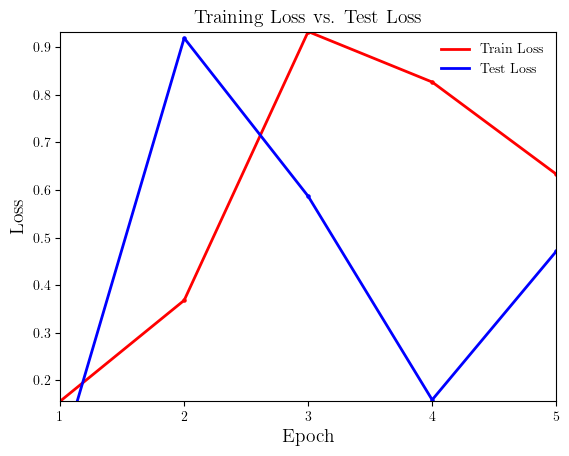

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import h5py
from matplotlib.ticker import MaxNLocator

# with h5py.File('/media/volume/sdc/exouser/cnn/development/Data.mat','r',libver='latest') as f:
#     epoch = f['epoch'][:]

train_loss  =  np.random.rand(5)
test_loss = np.random.rand(5)
# Plotting the loss

def plot_loss(train_loss, test_loss, save_fig=False, fig_name=None):
    
    epoch = np.arange(1, len(train_loss)+1)
    
    # Create a figure
    fig, axs = plt.subplots()

    # Create line plots for the two data arrays
    axs.plot(epoch, train_loss, label='Train Loss', linewidth=2, color='red')
    axs.plot(epoch, test_loss, label='Test Loss', linewidth=2, color='blue')    

    # Update the font size for axis labels and title
    font_size = 14
    font = 'Times New Roman'
    plt.rcParams['axes.labelsize'] = font_size
    plt.rcParams['axes.titlesize'] = font_size
    plt.rcParams['font.family'] = font
    plt.rcParams["text.usetex"] = True


    # Create scatter plots for the two data arrays
    point_size = 5
    axs.scatter(epoch, train_loss, color='red', marker='o', s=point_size)
    axs.scatter(epoch, test_loss, color='blue', marker='o', s=point_size)

    # Set titles and axis labels for the subplots
    axs.set_title("Training Loss vs. Test Loss")
    axs.set_xlabel("Epoch")
    axs.set_ylabel("Loss")

    # Set the x and y axis limits
    xmin, xmax = 1, len(epoch)
    ymin, ymax = min(train_loss) or min(test_loss), max(train_loss) or max(test_loss)
    axs.set_xlim(xmin, xmax)
    axs.set_ylim(ymin, ymax)
    axs.xaxis.set_major_locator(MaxNLocator(integer=True))

    # Set equal aspect ratio for the subplots
    axs.set_aspect('auto')

    # Set alpha value of the face color to 0
    axs.set_facecolor((0, 0, 0, 0))

    # Show the legend
    axs.legend(frameon=False)

    if save_fig:
        if fig_name is None:
            fig_name = "loss.pdf"
        plt.savefig(fig_name, format="pdf")
    # Show the plot
    plt.show()
    
plot_loss(train_loss, test_loss, save_fig=True, fig_name="loss.pdf")


In [7]:
# train_loss  = np.random.uniform(0, 5, 100)
# train_loss  = np.random.uniform(0, 3, 100)

# plot_epoch(train_loss, test_loss)

epoch = np.arange(1, len(test_loss)+1)
epoch

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])